Test accuracy: 87.85%


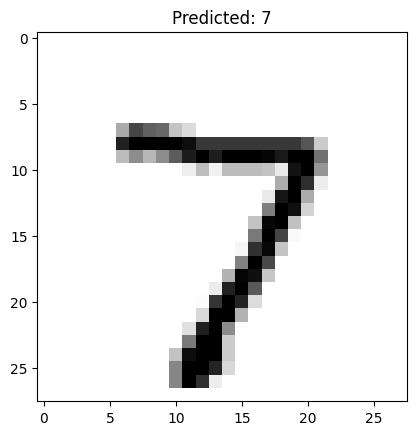

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess the data
# Flatten the images (28x28 -> 784 features)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Normalize the images to have values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Apply PCA (Dimensionality Reduction)
# Reduce dimensions to 100 for better performance in Naive Bayes
pca = PCA(n_components=100)  # Reduce to 100 principal components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# 4. Train a Naive Bayes model
nb_classifier = GaussianNB()

# Fit the model on the PCA-transformed data
nb_classifier.fit(x_train_pca, y_train)

# 5. Make predictions
y_pred = nb_classifier.predict(x_test_pca)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# 7. Display the first test image and predicted result
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {y_pred[0]}")
plt.show()